# Data Processing

Data will be pre-processed with the aim of performing clustering operations.


In [5]:
%%capture

# Running the previous files
%run data-extraction.ipynb


### Identifying categorical variables and label encoding them to numerical features


In [6]:
# Extract the list of categorical variables
obj_type = data.dtypes == "object"
cat_vars = list(obj_type[obj_type].index)

print("Categorical variables in dataset:", cat_vars)

# Label encode the object dtypes to transform them to numerical dtype
Label_Enc = LabelEncoder()
for i in cat_vars:
    data[i] = data[[i]].apply(Label_Enc.fit_transform)

Categorical variables in dataset: ['Education', 'Living_With']


### Scaling features using a standard scaler


In [7]:
ds = data.copy()

# Creating a subset cols_del of dataframe to be dropped
cols_del = [
    "AcceptedCmp1", "AcceptedCmp2",
    "AcceptedCmp3", "AcceptedCmp4",
    "AcceptedCmp5", "Complain",
    "Response",
]
ds = ds.drop(cols_del, axis=1)

# Perform scaling on all features. Normalise mean to 0 and standard deviation to 1
scaler = StandardScaler()
scaler.fit(ds)
scaled_data = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

At this point, all data are in numerical format and have been scaled for further modelling.


In [8]:
print("Current dataframe to be modelled:")
scaled_data.head()

Current dataframe to be modelled:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,2.504712,-0.554143,0.693232,1.529129,0.986443,1.675488,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.571082,-1.169518,-0.131574,-1.188411,1.236801,-0.962358,-1.348829,1.405806,0.450009,0.632356
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.229327,1.291982,-0.543978,-0.205155,0.318822,0.280250,0.741384,-1.264803,-0.654332,-1.581389
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.912837,-0.554143,0.280829,-1.059945,-1.266777,-0.919224,0.741384,0.070501,0.450009,0.632356
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.112428,0.061232,-0.131574,-0.951244,-1.016420,-0.307044,0.741384,0.070501,0.450009,0.632356


### Dimensionality reduction

At the moment, there are a large number of features, many of which are correlated and hence redundant. We reduce the number of features to work with by performing Principal Component Analysis (PCA) to reduce the dimensionality of the dataset to 3, whilst preserving as much information as possible.


In [9]:
# Perform PCA to reduce number of features/components/dimensions to 3
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1", "col2", "col3"]))

PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,6.412841e-18,2.850029,-5.881402,-2.489399,-0.795923,2.428344,7.390968
col2,2216.0,3.206420e-17,1.701845,-4.169995,-1.317372,-0.186315,1.232900,6.140593
col3,2216.0,4.529069e-17,1.228077,-5.051220,-0.845780,-0.048606,0.866476,6.713941


Next, we plot a 3D Projection of the data in the reduced dimensions.

Each axis represents one of the 3 principal components.


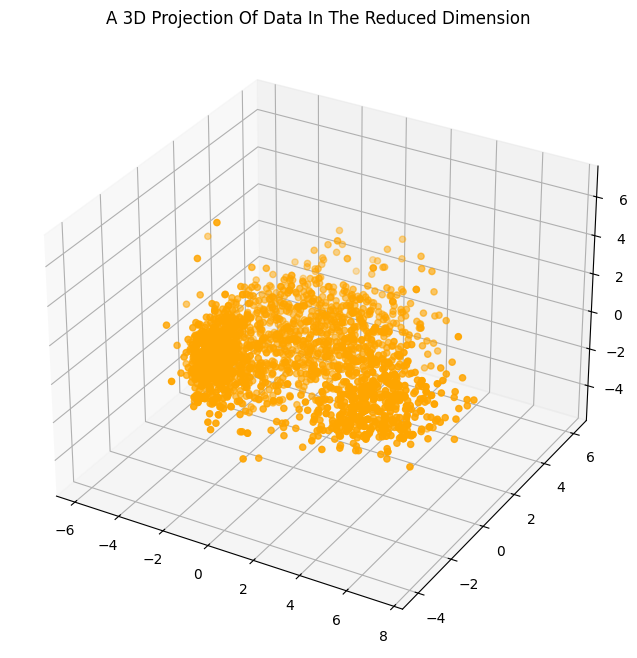

In [10]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="orange", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()